<a href="https://colab.research.google.com/github/sahar7888/Sentiment_analysis/blob/master/Glove_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%%
import torch
import torchtext.vocab as vocab
# %%

In [2]:
glove = vocab.GloVe(name='6B', dim =100)
# %% number of words and embeddings
glove.vectors.shape


.vector_cache/glove.6B.zip: 862MB [02:38, 5.43MB/s]                           
100%|█████████▉| 399999/400000 [00:18<00:00, 21300.80it/s]


torch.Size([400000, 100])

In [5]:
#%% get an embedding vector
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    print(word_index)
    emb = glove.vectors[word_index]
    return emb

get_embedding_vector('chess').shape


7162


torch.Size([100])

In [6]:
#%% find closest words from input word
def get_closest_words_from_word(word, max_n=5):
    word_emb = get_embedding_vector(word)
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return dist_sort_filt

get_closest_words_from_word('chess')


Streaming output truncated to the last 5000 lines.
395000
395001
395002
395003
395004
395005
395006
395007
395008
395009
395010
395011
395012
395013
395014
395015
395016
395017
395018
395019
395020
395021
395022
395023
395024
395025
395026
395027
395028
395029
395030
395031
395032
395033
395034
395035
395036
395037
395038
395039
395040
395041
395042
395043
395044
395045
395046
395047
395048
395049
395050
395051
395052
395053
395054
395055
395056
395057
395058
395059
395060
395061
395062
395063
395064
395065
395066
395067
395068
395069
395070
395071
395072
395073
395074
395075
395076
395077
395078
395079
395080
395081
395082
395083
395084
395085
395086
395087
395088
395089
395090
395091
395092
395093
395094
395095
395096
395097
395098
395099
395100
395101
395102
395103
395104
395105
395106
395107
395108
395109
395110
395111
395112
395113
395114
395115
395116
395117
395118
395119
395120
395121
395122
395123
395124
395125
395126
395127
395128
395129
395130
395131
395132
395133
395134
3951

[('chess', 0.0),
 ('backgammon', 4.379469394683838),
 ('grandmasters', 4.56368350982666),
 ('grandmaster', 4.613785743713379),
 ('scrabble', 4.677640438079834)]

In [7]:
#%% find closest words from embedding
def get_closest_words_from_embedding(word_emb, max_n=5):
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return dist_sort_filt

In [8]:
def get_word_analogy(word1, word2, word3, max_n=5):
    # logic w1= king, ...
    # w1 - w2 + w3 --> w4
    word1_emb = get_embedding_vector(word1)
    word2_emb = get_embedding_vector(word2)
    word3_emb = get_embedding_vector(word3)
    word4_emb = word1_emb - word2_emb + word3_emb
    analogy = get_closest_words_from_embedding(word4_emb)
    return analogy

get_word_analogy(word1='sister', word2='brother', word3='nephew')

Streaming output truncated to the last 5000 lines.
395000
395001
395002
395003
395004
395005
395006
395007
395008
395009
395010
395011
395012
395013
395014
395015
395016
395017
395018
395019
395020
395021
395022
395023
395024
395025
395026
395027
395028
395029
395030
395031
395032
395033
395034
395035
395036
395037
395038
395039
395040
395041
395042
395043
395044
395045
395046
395047
395048
395049
395050
395051
395052
395053
395054
395055
395056
395057
395058
395059
395060
395061
395062
395063
395064
395065
395066
395067
395068
395069
395070
395071
395072
395073
395074
395075
395076
395077
395078
395079
395080
395081
395082
395083
395084
395085
395086
395087
395088
395089
395090
395091
395092
395093
395094
395095
395096
395097
395098
395099
395100
395101
395102
395103
395104
395105
395106
395107
395108
395109
395110
395111
395112
395113
395114
395115
395116
395117
395118
395119
395120
395121
395122
395123
395124
395125
395126
395127
395128
395129
395130
395131
395132
395133
395134
3951

[('sister', 2.5398471355438232),
 ('niece', 2.700707197189331),
 ('granddaughter', 3.272900342941284),
 ('sister-in-law', 3.652935743331909),
 ('cousin', 3.657327651977539)]

# **Clustering**

In [9]:
#%% packages
import pandas as pd
from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE
import torchtext.vocab as vocab
import torch

In [10]:
#%% import GloVe
glove_dim = 100
glove = vocab.GloVe(name='6B', dim = glove_dim)

In [11]:
#%% Get closest words from word input
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb

In [12]:
def get_closest_words_from_word(word, max_n=5):
    word_emb = get_embedding_vector(word)
    distances = [(w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return [item[0] for item in dist_sort_filt]

get_closest_words_from_word(word='chess', max_n=10)

['chess',
 'backgammon',
 'grandmasters',
 'grandmaster',
 'scrabble',
 'billiards',
 'xiangqi',
 'kasparov',
 'snooker',
 'olympiad']

In [13]:
# %%
words = []
categories = ['numbers', 'algebra', 'music', 'science', 'technology']

df_word_cloud = pd.DataFrame({
    'category': [],
    'word': []
})

for category in categories:
    print(category)
    closest_words = get_closest_words_from_word(word=category, max_n=20)
    temp = pd.DataFrame({
        'category': [category] * len(closest_words),
        'word': closest_words
    })
    df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)


numbers
algebra
music
science
technology


In [14]:
# %% get the 100 dimension word embedding for all words
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, 'word']
    X[i, :] = get_embedding_vector(current_word)
    print(f"{i}: {current_word}")

0: numbers
1: number
2: though
3: instance
4: fact
5: indicate
6: moreover
7: comparison
8: figures
9: although
10: indeed
11: example
12: mean
13: proportion
14: same
15: fewer
16: seen
17: indicates
18: given
19: ones
20: algebra
21: algebras
22: geometry
23: heyting
24: homological
25: trigonometry
26: boolean
27: mathematics
28: algebraic
29: generalization
30: calculus
31: associative
32: formula_1
33: multiplication
34: arithmetic
35: commutative
36: isomorphic
37: linear
38: equivalently
39: quaternion
40: music
41: musical
42: dance
43: songs
44: pop
45: recording
46: folk
47: jazz
48: concert
49: musicians
50: contemporary
51: artists
52: soundtrack
53: hop
54: studio
55: song
56: tunes
57: singing
58: band
59: performing
60: science
61: sciences
62: physics
63: mathematics
64: studies
65: institute
66: biology
67: psychology
68: research
69: scientific
70: humanities
71: study
72: economics
73: literature
74: sociology
75: arts
76: chemistry
77: astronomy
78: journalism
79: p

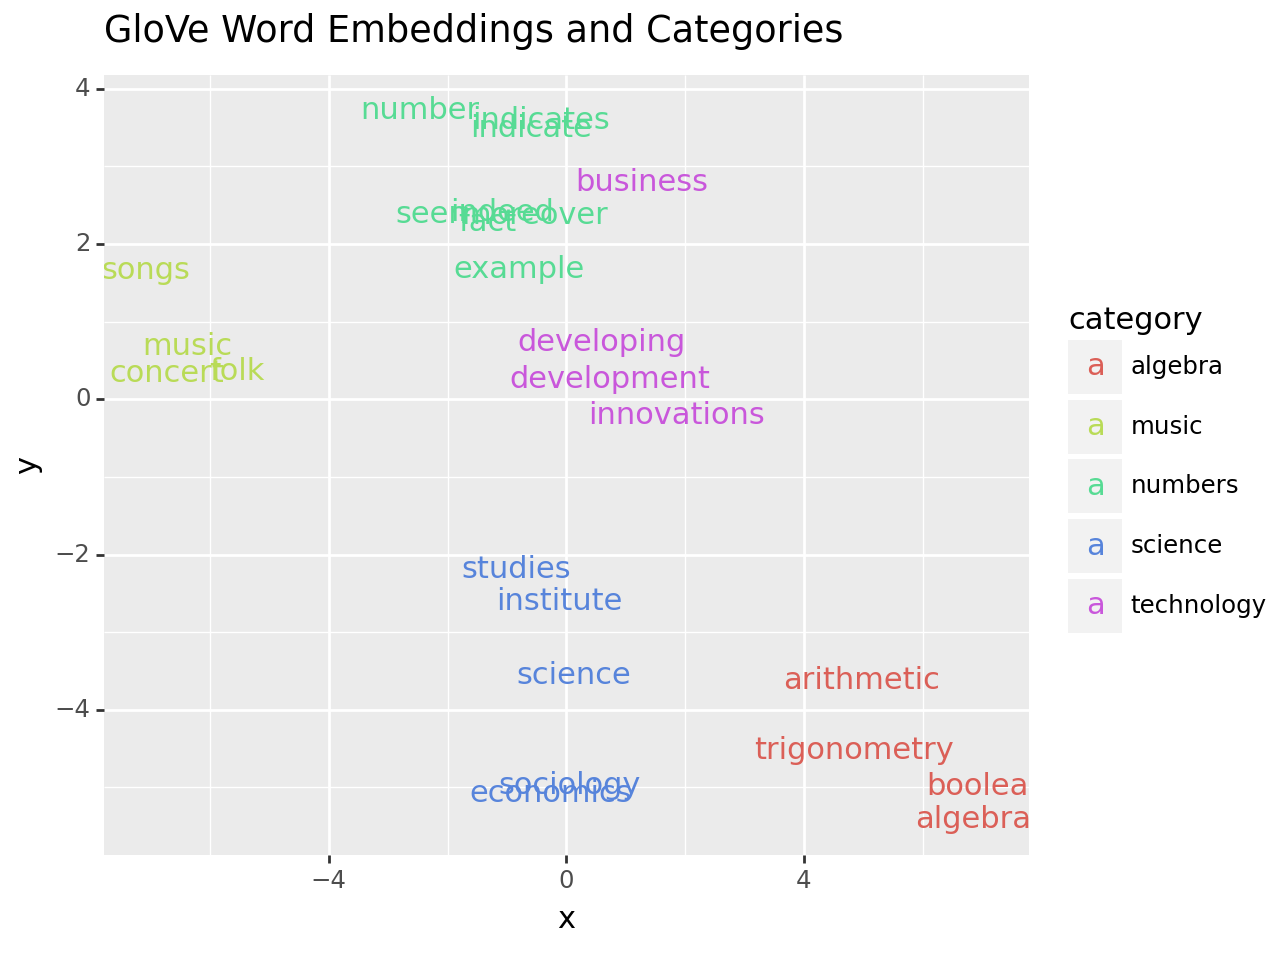

<Figure Size: (640 x 480)>

In [15]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.cpu().numpy())
# %%
df_word_cloud['x'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]

ggplot(data=df_word_cloud.sample(25)) + aes(x = 'x', y='y', label = 'word', color = 'category') + geom_text() + labs(title='GloVe Word Embeddings and Categories')

# ***Sentiment analysis using NN***

In [17]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [19]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sentence_transformers import SentenceTransformer

In [20]:
#%% import data
twitter_file = 'Tweets.csv'
df = pd.read_csv(twitter_file).dropna()
df
#%% Create Target Variable
cat_id = {'neutral': 1,
          'negative': 0,
          'positive': 2}

df['class'] = df['sentiment'].map(cat_id)

In [21]:
#%% Hyperparameters
BATCH_SIZE = 128
NUM_EPOCHS = 80
MAX_FEATURES = 10

#%% Embedding Model
emb_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')

sentences = [ "Each sentence is converted"]
embeddings = emb_model.encode(sentences)
print(embeddings.squeeze().shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/591 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(768,)


In [23]:
#%% prepare X and y
X = emb_model.encode(df['text'].values)

with open("tweets_X.pkl", "wb") as output_file:
    pickle.dump(X, output_file)

In [25]:
with open("tweets_X.pkl", "rb") as input_file:
    X = pickle.load(input_file)

y = df['class'].values


In [26]:
#%% Train Val Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# %%
class SentimentData(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).type(torch.LongTensor)
        self.len = len(self.X)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        return self.X[index], self.y[index]


train_ds = SentimentData(X= X_train, y = y_train)
test_ds = SentimentData(X_test, y_test)

In [27]:
# %% Dataloader
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=15000)

# %% Model
class SentimentModel(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN = 10):
        super().__init__()
        self.linear = nn.Linear(NUM_FEATURES, HIDDEN)
        self.linear2 = nn.Linear(HIDDEN, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x

In [28]:
#%% Model, Loss and Optimizer
model = SentimentModel(NUM_FEATURES = X_train.shape[1], NUM_CLASSES = 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

# %% Model Training
train_losses = []
for e in range(NUM_EPOCHS):
    curr_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_log = model(X_batch)
        loss = criterion(y_pred_log, y_batch.long())

        curr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(curr_loss)
    print(f"Epoch {e}, Loss: {curr_loss}")

Epoch 0, Loss: 109.63509291410446
Epoch 1, Loss: 90.38306051492691
Epoch 2, Loss: 81.23140716552734
Epoch 3, Loss: 77.92146724462509
Epoch 4, Loss: 76.05092859268188
Epoch 5, Loss: 74.84168893098831
Epoch 6, Loss: 73.89412826299667
Epoch 7, Loss: 73.12702786922455
Epoch 8, Loss: 72.58645701408386
Epoch 9, Loss: 71.99435794353485
Epoch 10, Loss: 71.51453047990799
Epoch 11, Loss: 71.05090290307999
Epoch 12, Loss: 70.55369621515274
Epoch 13, Loss: 70.18649962544441
Epoch 14, Loss: 69.87921065092087
Epoch 15, Loss: 69.53606504201889
Epoch 16, Loss: 69.09387999773026
Epoch 17, Loss: 68.84516301751137
Epoch 18, Loss: 68.49000787734985
Epoch 19, Loss: 68.31978237628937
Epoch 20, Loss: 68.06593888998032
Epoch 21, Loss: 67.87323421239853
Epoch 22, Loss: 67.55008262395859
Epoch 23, Loss: 67.22988244891167
Epoch 24, Loss: 67.00732579827309
Epoch 25, Loss: 67.07521319389343
Epoch 26, Loss: 66.54107609391212
Epoch 27, Loss: 66.40692299604416
Epoch 28, Loss: 66.0576896071434
Epoch 29, Loss: 65.87653

'The accuracy of the model is 68.30000000000001%.'

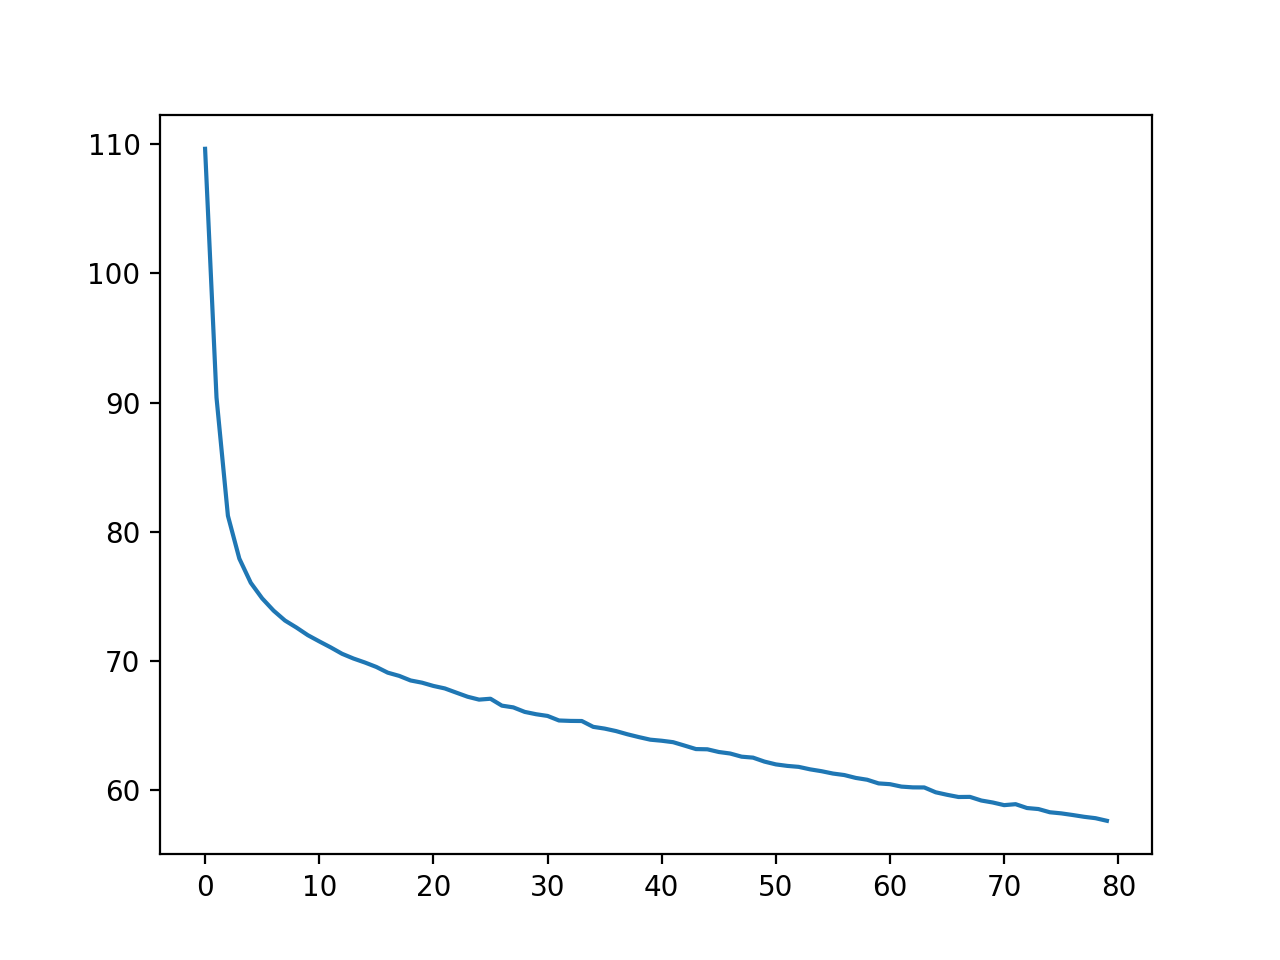

In [30]:
# %%
sns.lineplot(x=list(range(len(train_losses))), y= train_losses)
# %% Model Evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_test_pred_log = model(X_batch)
        y_test_pred = torch.argmax(y_test_pred_log, dim = 1)

# %%
y_test_pred_np = y_test_pred.squeeze().cpu().numpy()

# %%
acc = accuracy_score(y_pred=y_test_pred_np, y_true = y_test)
f"The accuracy of the model is {np.round(acc, 3)*100}%."
# # %%
# most_common_cnt = Counter(y_test).most_common()[0][1]
# print(f"Naive Classifier: {np.round(most_common_cnt / len(y_test) * 100, 1)} %")